### This file plots the processed csv files with matplotlib

Note: manually select date and file name in the corresponding section (either cpu, netsend or netrecv)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [2]:
date = '2018-10-21_11h46'
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/one_server/' + date + '/'


In [3]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

## CPU utilization plot

In [4]:
# read data into pandas dataframe
file_name = 'dstat_client_cpu_ratio_0:1.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,cpu_mean,cpu_std
0,2,7.813714,0.006429
1,4,7.848214,0.259214


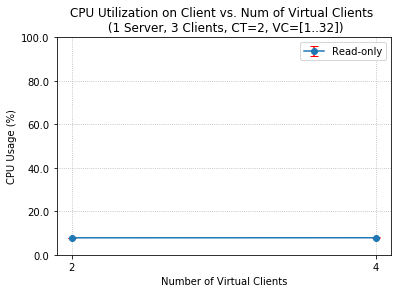

In [6]:
f = plt.figure()
plt.title("CPU Utilization on Client vs. Num of Virtual Clients \n (1 Server, 3 Clients, CT=2, VC=[1..32])")

vcs = df_c['client']
ys = df_c['cpu_mean']
std = df_c['cpu_std']
plt.errorbar(x = vcs, y = ys, yerr = std, label = "Read-only", capsize = 4, ecolor='r', marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("CPU Usage (%)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=100)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/one_server/"+date+"/"+file_name[:-4]+".png", dpi = 150)

## Network send activity plot

In [7]:
# read data into pandas dataframe
file_name = 'dstat_client_netsend_ratio_0:1.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,netsend_mean,netsend_std
0,2,166967.428571,554.857143
1,4,163698.214286,484.357143


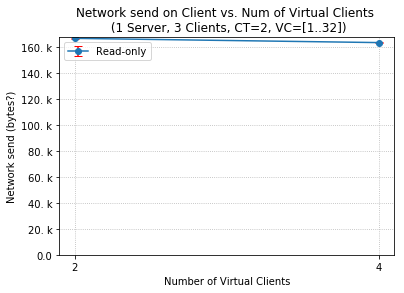

In [8]:
f = plt.figure()
plt.title("Network send on Client vs. Num of Virtual Clients \n (1 Server, 3 Clients, CT=2, VC=[1..32])")

vcs = df_c['client']
ys = df_c['netsend_mean']
std = df_c['netsend_std']
plt.errorbar(x = vcs, y = ys, yerr = std, label = "Read-only", capsize = 4, ecolor='r', marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Network send (bytes?)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/one_server/"+date+"/"+file_name[:-4]+".png", dpi = 150)

## Network recv activity plot

In [9]:
# read data into pandas dataframe
file_name = 'dstat_client_netrecv_ratio_0:1.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,netrecv_mean,netrecv_std
0,2,4.617249e+06,23006.428571
1,4,4.553825e+06,14818.285714


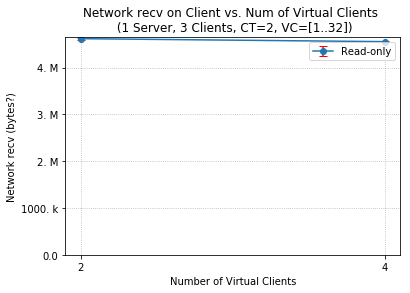

In [10]:
f = plt.figure()
plt.title("Network recv on Client vs. Num of Virtual Clients \n (1 Server, 3 Clients, CT=2, VC=[1..32])")

vcs = df_c['client']
ys = df_c['netrecv_mean']
std = df_c['netrecv_std']
plt.errorbar(x = vcs, y = ys, yerr = std, label = "Read-only", capsize = 4, ecolor='r', marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Network recv (bytes?)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0)
plt.legend()


ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/one_server/"+date+"/"+file_name[:-4]+".png", dpi = 150)